In [ ]:
! kill -9 -1

In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
from tqdm import tqdm
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=6f97fd725fdb44d993c1ea4c5ed6a779650e9c494b4b93bc619f1fa5b8de46d7
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 112.7 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [2]:
import torch

torch.cuda.empty_cache()

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("There are {} GPUs available.".format(torch.cuda.device_count()))
    print("We will use GPU {}".format(torch.cuda.get_device_name(0)))
else:
    print("There is no GPU available, using the CPU instead!")
    device = torch.device("cpu")

There are 1 GPUs available.
We will use GPU Tesla T4


Loading the Data

In [1]:
import pandas as pd

part_1 = pd.read_csv("../../Data/LWB_Monthly_data.csv")

In [2]:
part_1.shape

(123311, 341)

In [3]:
part_1.head(5)

,_key_client_id,_key_occurreddate_month,incident_catgry_care_concern_piv,incident_catgry_medication_piv,incident_catgry_medical_piv,incident_catgry__piv,incident_catgry_death_piv,incident_catgry_property_and_vehicles_piv,incident_catgry_physical_and_sexual_assault_piv,incident_catgry_client_missing_piv,...,rp_type_detail_rp_end_environmental_restraint_piv,rp_type_detail_rp_end_chemical_restraint_psychotropic_medication_piv,rp_type_detail_rp_end_restricted_access_piv,rp_type_detail_rp_start_restricted_access_piv,rp_type_detail_rp_end_mechanical_restraint_piv,rp_type_detail_rp_start_chemical_restraint_psychotropic_medication_piv,rp_type_detail_rp_start_environmental_restraint_piv,rp_type_detail_rp_end_exclusionary_time_out_not_including_seclusion_piv,restrictivepractice_isemergency_false_piv,restrictivepractice_isemergency_true_piv
0,0000D172-EA88-432F-8235-9FAA00D29072,2019-04-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000D172-EA88-432F-8235-9FAA00D29072,2019-05-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0000D172-EA88-432F-8235-9FAA00D29072,2019-06-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0000D172-EA88-432F-8235-9FAA00D29072,2019-07-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0000D172-EA88-432F-8235-9FAA00D29072,2019-08-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
ori_data = part_1.drop(['_key_client_id', '_key_occurreddate_month', 'response_variable'], axis=1)

import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()

for column in ori_data.columns:
      scale_param = scaler.fit(ori_data[column].values.reshape(-1, 1))
      ori_data[column] = scaler.fit_transform(ori_data[column].values.reshape(-1, 1), scale_param)

print(ori_data.shape)

(123311, 338)


In [5]:
# column_names = list(ori_data.columns)
# print(len(column_names))

In [6]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# ori_value = ori_data.values
# labels = part_1['response_variable'].values

# F_score, p_values = f_classif(ori_value, labels)

# print(len(F_score))
# print(len(p_values))



In [7]:
# vital_feature = {}
# vital_features = []

# for id, p_value in enumerate(p_values):
#     if p_value < 0.05:
#       vital_feature[column_names[id]] = p_values
#       vital_features.append(column_names[id])

# print(len(vital_feature))
# print(len(vital_features))


In [8]:
ori_data['_key_client_id'] = part_1['_key_client_id']
ori_data['_key_occurreddate_month'] = part_1['_key_occurreddate_month']
ori_data['response_variable'] = part_1['response_variable']

print(ori_data.shape)

(123311, 341)


In [9]:
init_record = ori_data 
init_record = init_record.set_index(['_key_client_id', '_key_occurreddate_month'])
init_record.head(10)

incident_catgry_care_concern_piv  \
_key_client_id                       _key_occurreddate_month                                     
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                       -0.06465   
                                     2019-05-01                                       -0.06465   
                                     2019-06-01                                       -0.06465   
                                     2019-07-01                                       -0.06465   
                                     2019-08-01                                       -0.06465   
                                     2019-09-01                                       -0.06465   
                                     2019-10-01                                       -0.06465   
                                     2019-11-01                                       -0.06465   
                                     2019-12-01                                       -0.06465   
                                     2020-01-01                                       -0.06465   

                                                              incident_catgry_medication_piv  \
_key_client_id                       _key_occurreddate_month                                   
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                    -0.067893   
                                     2019-05-01                                    -0.067893   
                                     2019-06-01                                    -0.067893   
                                     2019-07-01                                    -0.067893   
                                     2019-08-01                                    -0.067893   
                                     2019-09-01                                    -0.067893   
                                     2019-10-01                                    -0.067893   
                                     2019-11-01                                    -0.067893   
                                     2019-12-01                                    -0.067893   
                                     2020-01-01                                    -0.067893   

                                                              incident_catgry_medical_piv  \
_key_client_id                       _key_occurreddate_month                                
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                 -0.103924   
                                     2019-05-01                                 -0.103924   
                                     2019-06-01                                 -0.103924   
                                     2019-07-01                                 -0.103924   
                                     2019-08-01                                 -0.103924   
                                     2019-09-01                                 -0.103924   
                                     2019-10-01                                 -0.103924   
                                     2019-11-01                                 -0.103924   
                                     2019-12-01                                 -0.103924   
                                     2020-01-01                                 -0.103924   

                                                              incident_catgry__piv  \
_key_client_id                       _key_occurreddate_month                         
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                          -0.030566   
                                     2019-05-01                          -0.030566   
                                     2019-06-01                          -0.030566   
                                     2019-07-01                          -0.030566   
                                     2019-08-01                          -0.030566   
             

In [10]:
# summarize the total number of clients (year)
index_dict = {}
for ind in init_record.index:
    if ind[0] not in index_dict:
        index_dict[ind[0]] = []
        index_dict[ind[0]].append(ind[1])
    else:
        index_dict[ind[0]].append(ind[1])

print(len(index_dict))

13405


In [11]:
# Plot the distribution of record number
from collections import defaultdict
from tqdm import tqdm

record_num = defaultdict(list)
record_list = []

for id, value in tqdm(index_dict.items()):
    record_num[len(value)].append(id)
    record_list.append(len(value))

print('\nThe Length of the record number dictionary is {}'.format(len(record_num)))
print(len(record_list))

100%|██████████| 13405/13405 [00:00<00:00, 946080.96it/s]


The Length of the record number dictionary is 11
13405


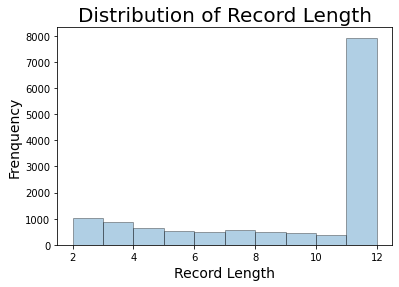

In [12]:
import matplotlib.pyplot as plt

plt.title('Distribution of Record Length',fontsize=20)
plt.xlabel(u'Record Length',fontsize=14)
plt.ylabel(u'Frenquency',fontsize=14)
plt.hist(record_list, edgecolor='k', alpha=0.35)
plt.show()

In [13]:
## Store the full-record clinet record in initial_data
initial_data = {}
for inde in index_dict.keys():
    if len(index_dict[inde]) > 4 and len(index_dict[inde]) <= 12:
        initial_data[inde] = init_record.loc[inde]
print(len(initial_data))

10835


In [14]:
# Build the train dataset

all_features = []
all_labels = []

for key in tqdm(initial_data.keys()):
    all_labels.append(initial_data[key]['response_variable'])
    temp_sample = initial_data[key].drop(['response_variable'], axis=1)
    all_features.append(temp_sample)

print('\nThe length of All the feature is {}'.format(len(all_features)))
print('\nThe length of All labels is {}'.format(len(all_labels)))

100%|██████████| 10835/10835 [00:07<00:00, 1390.86it/s]


The length of All the feature is 10835

The length of All labels is 10835


In [15]:
feature_sample = []
label_sample = []


## k is the window size
def split_df(feature_data, label_data, k):
    
    df_list = []
    label_list = []
    i = 0
    while i+k < feature_data.shape[0]:
        temp = feature_data[i: i+k, :]
        df_list.append(temp)
        label_list.append(label_data[i+k])
        i += 1
    return df_list, label_list

for i in tqdm(range(len(all_features))):
    feature_temp_list, label_temp_list = split_df(all_features[i].values, all_labels[i].values, 4)
    for feature in feature_temp_list:
        feature_sample.append(feature)
    # feature_sample.append(feature_temp_list) 
    for label in label_temp_list:
        label_sample.append(label) ## When the sample size to 5000, should be 40000
    # label_sample.append(label_temp_list[-1]) ## Should be 5000
    
print(len(feature_sample))
print(len(label_sample))

100%|██████████| 10835/10835 [00:00<00:00, 34357.34it/s]

72642
72642


In [16]:
from collections import Counter

print('The Distribution of the Label Data is {}'.format(Counter(label_sample)))

The Distribution of the Label Data is Counter({0: 67348, 1: 5294})


In [17]:
# Now we split the negative data into train and test, and inject the positive 
# sample into test data;

pos_idx = []
neg_idx = []

for idx in range(len(label_sample)):
   if label_sample[idx] == 1:
      pos_idx.append(idx)
   else:
      neg_idx.append(idx)

print(len(pos_idx))
print(len(neg_idx))

5294
67348


In [18]:
def get_sample(index_list, samples):
    sample_list = []
    for index in index_list:
        sample_list.append(samples[index])

    return sample_list

def get_label(index_list, labels):
    label_list = []
    for index in index_list:
        label_list.append(labels[index])

    return label_list

pos_sample = get_sample(pos_idx, feature_sample) 
neg_sample = get_sample(neg_idx, feature_sample)

pos_label = get_label(pos_idx, label_sample)
neg_label = get_label(neg_idx, label_sample)

print(len(pos_sample))
print(len(neg_sample))

print(len(pos_label))
print(len(neg_label))

5294
67348
5294
67348


In [19]:
import numpy as np

neg_data = np.array(neg_sample)
print(neg_data.shape)

neg_label = np.array(neg_label)
print(neg_label.shape)

pos_data = np.array(pos_sample)
print(pos_data.shape)

pos_label = np.array(pos_label)
print(pos_label.shape)

(67348, 4, 338)
(67348,)
(5294, 4, 338)
(5294,)


In [33]:
feature_sample = np.array(feature_sample)
label_sample = np.array(label_sample)

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_sample, label_sample, test_size=0.2)

In [35]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(58113, 4, 338)
(14529, 4, 338)
(58113,)
(14529,)


(58113, 1352)

Using DBN to Extract Feature

In [45]:
x_train = x_train.reshape(x_train.shape[0], -1)
print(x_train.shape)

(58113, 1352)


In [47]:
x_test = x_test.reshape(x_test.shape[0], -1)
x_test.shape

(14529, 1352)

In [48]:
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import lightgbm
import pandas as pd

In [49]:
train_data = lightgbm.Dataset(x_train, label=y_train)
eval_data = lightgbm.Dataset(x_test, label=y_test)

In [51]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}


In [52]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=eval_data,
                       num_boost_round=2000)

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.341946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[1]	valid_0's auc: 0.91969
[2]	valid_0's auc: 0.925345
[3]	valid_0's auc: 0.927022
[4]	valid_0's auc: 0.928817
[5]	valid_0's auc: 0.929421
[6]	valid_0's auc: 0.929704
[7]	valid_0's auc: 0.930163
[8]	valid_0's auc: 0.93045
[9]	valid_0's auc: 0.930543
[10]	valid_0's auc: 0.930902
[11]	valid_0's auc: 0.931127
[12]	valid_0's auc: 0.931288
[13]	valid_0's auc: 0.931377
[14]	valid_0's auc: 0.931298
[15]	valid_0's auc: 0.931339
[16]	

[259]	valid_0's auc: 0.935854
[260]	valid_0's auc: 0.935798
[261]	valid_0's auc: 0.9358
[262]	valid_0's auc: 0.935786
[263]	valid_0's auc: 0.935843
[264]	valid_0's auc: 0.935921
[265]	valid_0's auc: 0.935875
[266]	valid_0's auc: 0.935979
[267]	valid_0's auc: 0.936022
[268]	valid_0's auc: 0.936087
[269]	valid_0's auc: 0.936044
[270]	valid_0's auc: 0.936072
[271]	valid_0's auc: 0.936067
[272]	valid_0's auc: 0.936061
[273]	valid_0's auc: 0.936045
[274]	valid_0's auc: 0.936055
[275]	valid_0's auc: 0.936056
[276]	valid_0's auc: 0.935959
[277]	valid_0's auc: 0.935869
[278]	valid_0's auc: 0.935875
[279]	valid_0's auc: 0.935942
[280]	valid_0's auc: 0.935956
[281]	valid_0's auc: 0.936028
[282]	valid_0's auc: 0.936112
[283]	valid_0's auc: 0.936148
[284]	valid_0's auc: 0.936186
[285]	valid_0's auc: 0.936223
[286]	valid_0's auc: 0.936197
[287]	valid_0's auc: 0.936227
[288]	valid_0's auc: 0.936198
[289]	valid_0's auc: 0.936262
[290]	valid_0's auc: 0.936278
[291]	valid_0's auc: 0.936163
[292]	valid_

[533]	valid_0's auc: 0.934367
[534]	valid_0's auc: 0.93434
[535]	valid_0's auc: 0.934298
[536]	valid_0's auc: 0.934285
[537]	valid_0's auc: 0.934255
[538]	valid_0's auc: 0.934273
[539]	valid_0's auc: 0.934284
[540]	valid_0's auc: 0.934251
[541]	valid_0's auc: 0.934189
[542]	valid_0's auc: 0.934237
[543]	valid_0's auc: 0.93418
[544]	valid_0's auc: 0.934208
[545]	valid_0's auc: 0.934219
[546]	valid_0's auc: 0.934176
[547]	valid_0's auc: 0.934106
[548]	valid_0's auc: 0.934111
[549]	valid_0's auc: 0.934122
[550]	valid_0's auc: 0.93421
[551]	valid_0's auc: 0.934231
[552]	valid_0's auc: 0.934214
[553]	valid_0's auc: 0.934243
[554]	valid_0's auc: 0.934215
[555]	valid_0's auc: 0.934188
[556]	valid_0's auc: 0.934204
[557]	valid_0's auc: 0.934165
[558]	valid_0's auc: 0.934193
[559]	valid_0's auc: 0.934243
[560]	valid_0's auc: 0.934238
[561]	valid_0's auc: 0.934269
[562]	valid_0's auc: 0.934279
[563]	valid_0's auc: 0.934254
[564]	valid_0's auc: 0.934305
[565]	valid_0's auc: 0.934307
[566]	valid_0

[808]	valid_0's auc: 0.933656
[809]	valid_0's auc: 0.93365
[810]	valid_0's auc: 0.933661
[811]	valid_0's auc: 0.933688
[812]	valid_0's auc: 0.933684
[813]	valid_0's auc: 0.93372
[814]	valid_0's auc: 0.933714
[815]	valid_0's auc: 0.93372
[816]	valid_0's auc: 0.933732
[817]	valid_0's auc: 0.933691
[818]	valid_0's auc: 0.933699
[819]	valid_0's auc: 0.933714
[820]	valid_0's auc: 0.933735
[821]	valid_0's auc: 0.933776
[822]	valid_0's auc: 0.93376
[823]	valid_0's auc: 0.933772
[824]	valid_0's auc: 0.933793
[825]	valid_0's auc: 0.93377
[826]	valid_0's auc: 0.933716
[827]	valid_0's auc: 0.933747
[828]	valid_0's auc: 0.933747
[829]	valid_0's auc: 0.933711
[830]	valid_0's auc: 0.933727
[831]	valid_0's auc: 0.933746
[832]	valid_0's auc: 0.933736
[833]	valid_0's auc: 0.933707
[834]	valid_0's auc: 0.933726
[835]	valid_0's auc: 0.933701
[836]	valid_0's auc: 0.933666
[837]	valid_0's auc: 0.933632
[838]	valid_0's auc: 0.93364
[839]	valid_0's auc: 0.933668
[840]	valid_0's auc: 0.933613
[841]	valid_0's 

[1083]	valid_0's auc: 0.934032
[1084]	valid_0's auc: 0.934059
[1085]	valid_0's auc: 0.934068
[1086]	valid_0's auc: 0.934094
[1087]	valid_0's auc: 0.934056
[1088]	valid_0's auc: 0.934059
[1089]	valid_0's auc: 0.934082
[1090]	valid_0's auc: 0.934126
[1091]	valid_0's auc: 0.934151
[1092]	valid_0's auc: 0.934139
[1093]	valid_0's auc: 0.934128
[1094]	valid_0's auc: 0.934106
[1095]	valid_0's auc: 0.934115
[1096]	valid_0's auc: 0.934129
[1097]	valid_0's auc: 0.934144
[1098]	valid_0's auc: 0.9341
[1099]	valid_0's auc: 0.934108
[1100]	valid_0's auc: 0.934068
[1101]	valid_0's auc: 0.934025
[1102]	valid_0's auc: 0.93403
[1103]	valid_0's auc: 0.934007
[1104]	valid_0's auc: 0.933992
[1105]	valid_0's auc: 0.933967
[1106]	valid_0's auc: 0.933968
[1107]	valid_0's auc: 0.933947
[1108]	valid_0's auc: 0.933986
[1109]	valid_0's auc: 0.934027
[1110]	valid_0's auc: 0.934025
[1111]	valid_0's auc: 0.934029
[1112]	valid_0's auc: 0.934046
[1113]	valid_0's auc: 0.934003
[1114]	valid_0's auc: 0.934023
[1115]	vali

[1356]	valid_0's auc: 0.9335
[1357]	valid_0's auc: 0.93348
[1358]	valid_0's auc: 0.933489
[1359]	valid_0's auc: 0.933517
[1360]	valid_0's auc: 0.933541
[1361]	valid_0's auc: 0.933567
[1362]	valid_0's auc: 0.933549
[1363]	valid_0's auc: 0.933547
[1364]	valid_0's auc: 0.933607
[1365]	valid_0's auc: 0.933624
[1366]	valid_0's auc: 0.933603
[1367]	valid_0's auc: 0.933642
[1368]	valid_0's auc: 0.933705
[1369]	valid_0's auc: 0.933726
[1370]	valid_0's auc: 0.93377
[1371]	valid_0's auc: 0.933807
[1372]	valid_0's auc: 0.93384
[1373]	valid_0's auc: 0.93385
[1374]	valid_0's auc: 0.933836
[1375]	valid_0's auc: 0.933863
[1376]	valid_0's auc: 0.933873
[1377]	valid_0's auc: 0.933875
[1378]	valid_0's auc: 0.933889
[1379]	valid_0's auc: 0.933934
[1380]	valid_0's auc: 0.93391
[1381]	valid_0's auc: 0.933927
[1382]	valid_0's auc: 0.933926
[1383]	valid_0's auc: 0.933962
[1384]	valid_0's auc: 0.933953
[1385]	valid_0's auc: 0.933942
[1386]	valid_0's auc: 0.934003
[1387]	valid_0's auc: 0.93403
[1388]	valid_0's

[1623]	valid_0's auc: 0.932784
[1624]	valid_0's auc: 0.93278
[1625]	valid_0's auc: 0.93276
[1626]	valid_0's auc: 0.932783
[1627]	valid_0's auc: 0.932792
[1628]	valid_0's auc: 0.932801
[1629]	valid_0's auc: 0.932814
[1630]	valid_0's auc: 0.932803
[1631]	valid_0's auc: 0.932816
[1632]	valid_0's auc: 0.932851
[1633]	valid_0's auc: 0.93285
[1634]	valid_0's auc: 0.93287
[1635]	valid_0's auc: 0.93283
[1636]	valid_0's auc: 0.932841
[1637]	valid_0's auc: 0.932847
[1638]	valid_0's auc: 0.932839
[1639]	valid_0's auc: 0.932858
[1640]	valid_0's auc: 0.932877
[1641]	valid_0's auc: 0.932876
[1642]	valid_0's auc: 0.932879
[1643]	valid_0's auc: 0.932892
[1644]	valid_0's auc: 0.932834
[1645]	valid_0's auc: 0.932839
[1646]	valid_0's auc: 0.932794
[1647]	valid_0's auc: 0.932774
[1648]	valid_0's auc: 0.932778
[1649]	valid_0's auc: 0.932768
[1650]	valid_0's auc: 0.932782
[1651]	valid_0's auc: 0.932796
[1652]	valid_0's auc: 0.932797
[1653]	valid_0's auc: 0.932822
[1654]	valid_0's auc: 0.932832
[1655]	valid_

[1893]	valid_0's auc: 0.931992
[1894]	valid_0's auc: 0.931984
[1895]	valid_0's auc: 0.93196
[1896]	valid_0's auc: 0.931957
[1897]	valid_0's auc: 0.93199
[1898]	valid_0's auc: 0.93198
[1899]	valid_0's auc: 0.931976
[1900]	valid_0's auc: 0.931986
[1901]	valid_0's auc: 0.93199
[1902]	valid_0's auc: 0.932015
[1903]	valid_0's auc: 0.931982
[1904]	valid_0's auc: 0.931969
[1905]	valid_0's auc: 0.931995
[1906]	valid_0's auc: 0.931991
[1907]	valid_0's auc: 0.932011
[1908]	valid_0's auc: 0.931989
[1909]	valid_0's auc: 0.931949
[1910]	valid_0's auc: 0.931939
[1911]	valid_0's auc: 0.931935
[1912]	valid_0's auc: 0.931924
[1913]	valid_0's auc: 0.931943
[1914]	valid_0's auc: 0.931931
[1915]	valid_0's auc: 0.93193
[1916]	valid_0's auc: 0.931923
[1917]	valid_0's auc: 0.931908
[1918]	valid_0's auc: 0.931943
[1919]	valid_0's auc: 0.931942
[1920]	valid_0's auc: 0.931944
[1921]	valid_0's auc: 0.931953
[1922]	valid_0's auc: 0.931947
[1923]	valid_0's auc: 0.931913
[1924]	valid_0's auc: 0.931929
[1925]	valid_

In [54]:
y_scores = model.predict(x_test)
y_hat = np.where(y_scores < 0.5, 0, 1)  
f1_score(y_test,y_hat)

0.5331139448786507

In [55]:
from sklearn.metrics import classification_report

lof_report = classification_report(y_test,y_hat, labels=[0,1])
print(lof_report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     13471
           1       0.47      0.61      0.53      1058

    accuracy                           0.92     14529
   macro avg       0.72      0.78      0.75     14529
weighted avg       0.93      0.92      0.93     14529



In [57]:
# Train the DBN

from DBN import DBN

num_epochs = 20
batch_size = 100
k = 2
visible_unit = 1352
hidden_unit = [800, 338]
learning_rate = 0.05
learning_rate_decay = True
xavier_init = True
use_gpu = True


dbn = DBN(visible_unit= visible_unit,
                hidden_unit=hidden_unit,
                k = k,
                learning_rate = learning_rate,
                learning_rate_decay = learning_rate_decay,
                xavier_init = xavier_init,
                use_gpu = use_gpu)

dbn_output = dbn.train_stat(x_train_tensor, num_epochs, batch_size)

40it [00:00, 396.80it/s]

--------------------
Training the 1 rbm layer


539it [00:01, 513.29it/s]
539it [00:00, 559.51it/s]
539it [00:00, 555.72it/s]
539it [00:00, 552.54it/s]
539it [00:00, 560.10it/s]
539it [00:00, 556.22it/s]
539it [00:00, 551.34it/s]
539it [00:00, 551.58it/s]
539it [00:00, 555.20it/s]
539it [00:00, 567.21it/s]
539it [00:00, 563.41it/s]
539it [00:00, 561.47it/s]
539it [00:00, 555.89it/s]
539it [00:00, 578.37it/s]
539it [00:00, 562.31it/s]
539it [00:00, 570.27it/s]
539it [00:00, 566.96it/s]
539it [00:00, 563.54it/s]
539it [00:00, 569.80it/s]
539it [00:00, 571.40it/s]
57it [00:00, 569.61it/s]

Epoch:20 finished, avg_cost = 79.75440979003906, std_cost = 33.98025894165039, avg_grad = 48922.09375, std_grad = 3790.1298828125
--------------------
Training the 2 rbm layer


539it [00:00, 683.12it/s]
539it [00:00, 684.48it/s]
539it [00:00, 697.84it/s]
539it [00:00, 680.92it/s]
539it [00:00, 700.55it/s]
539it [00:00, 690.98it/s]
539it [00:00, 697.00it/s]
539it [00:00, 691.71it/s]
539it [00:00, 694.53it/s]
539it [00:00, 708.39it/s]
539it [00:00, 687.29it/s]
539it [00:00, 696.09it/s]
539it [00:00, 690.02it/s]
539it [00:00, 696.80it/s]
539it [00:00, 703.11it/s]
539it [00:00, 700.38it/s]
539it [00:00, 694.03it/s]
539it [00:00, 693.91it/s]
539it [00:00, 696.67it/s]
539it [00:00, 687.52it/s]


Epoch:20 finished, avg_cost = 0.1629595160484314, std_cost = 0.21466709673404694, avg_grad = 196.11386108398438, std_grad = 160.9275665283203


In [58]:
# The Train Data Through DBN

_, x_train_re = dbn.forward(x_train_tensor)

print(x_train_re.shape)

x_train_arr = x_train_re.cpu().numpy()

print(type(x_train_arr))
print(x_train_arr.shape)

torch.Size([53878, 338])
<class 'numpy.ndarray'>
(53878, 338)


In [59]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel="rbf", gamma="scale", tol=1e-6)
model.fit(x_train_arr)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.5, shrinking=True, tol=1e-06, verbose=False)

In [60]:
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_test.shape)

x_test_tensor = torch.FloatTensor(x_test)

print(type(x_test_tensor))
print(x_test_tensor.shape)

_, x_test_re = dbn.forward(x_test_tensor)

print(x_test_re.shape)

x_test_arr = x_test_re.cpu().numpy()

print(type(x_test_arr))
print(x_test_arr.shape)

(18764, 1352)
<class 'torch.Tensor'>
torch.Size([18764, 1352])
torch.Size([18764, 338])
<class 'numpy.ndarray'>
(18764, 338)


In [61]:
result = model.predict(x_test_arr)

predicts = []
for item in result:
    if item == -1:
       predicts.append(1)
    else:
       predicts.append(0)

predicts = np.array(predicts)

print(predicts.shape)

(18764,)


In [62]:
y_test = np.array(y_test)

In [63]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predicts, labels=[0,1])
print(report)

              precision    recall  f1-score   support

           0       0.92      0.63      0.74     13470
           1       0.47      0.85      0.61      5294

    accuracy                           0.69     18764
   macro avg       0.69      0.74      0.68     18764
weighted avg       0.79      0.69      0.71     18764



In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicts)
print(cm)

[[8431 5039]
 [ 768 4526]]


In [65]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[8431 5039]
 [ 768 4526]]


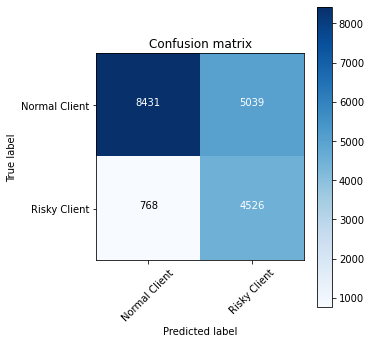

In [66]:
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, ['Normal Client', 'Risky Client'])

In [68]:
from sklearn.externals import joblib

OCsvm = joblib.dump(model, 'oneclass-SVM.v4.model')

Now Applying the Isolated Forest

In [89]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=200, contamination=0.25)

iso_forest.fit(x_train_arr)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.25,
                max_features=1.0, max_samples='auto', n_estimators=200,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [95]:
if_result = iso_forest.predict(x_test_arr)

if_predicts = []
for item in if_result:
    if item == -1:
       if_predicts.append(1)
    else:
       if_predicts.append(0)

if_predicts = np.array(if_predicts)

print(if_predicts.shape)

(18764,)


In [96]:
from sklearn.metrics import classification_report

if_report = classification_report(y_test, if_predicts, labels=[0,1])
print(if_report)

              precision    recall  f1-score   support

           0       0.88      0.75      0.81     13470
           1       0.53      0.73      0.62      5294

    accuracy                           0.74     18764
   macro avg       0.71      0.74      0.71     18764
weighted avg       0.78      0.74      0.75     18764



In [97]:
from sklearn.metrics import confusion_matrix

if_cm = confusion_matrix(y_test, if_predicts)
print(if_cm)

[[10098  3372]
 [ 1423  3871]]


[[10098  3372]
 [ 1423  3871]]


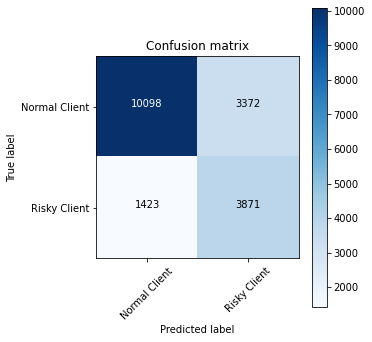

In [98]:
plt.figure(figsize=(5,5))
plot_confusion_matrix(if_cm, ['Normal Client', 'Risky Client'])

In [111]:
from sklearn.externals import joblib

Iforest = joblib.dump(iso_forest, 'IsolatedForest.model')

Applying the LocalOutlierFactor

In [106]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=5, novelty=True)
lof.fit(x_train_arr)


LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=5, novelty=True, p=2)

In [107]:
lof_result = lof.predict(x_test_arr)

lof_predicts = []
for item in lof_result:
    if item == -1:
       lof_predicts.append(1)
    else:
       lof_predicts.append(0)

lof_predicts = np.array(lof_predicts)

print(lof_predicts.shape)

(18764,)


In [108]:
from sklearn.metrics import classification_report

lof_report = classification_report(y_test, lof_predicts, labels=[0,1])
print(lof_report)

              precision    recall  f1-score   support

           0       0.72      1.00      0.84     13470
           1       0.00      0.00      0.00      5294

    accuracy                           0.72     18764
   macro avg       0.36      0.50      0.42     18764
weighted avg       0.52      0.72      0.60     18764



In [109]:
from sklearn.metrics import confusion_matrix

lof_cm = confusion_matrix(y_test, lof_predicts)
print(lof_cm)

[[13466     4]
 [ 5294     0]]


[[13466     4]
 [ 5294     0]]


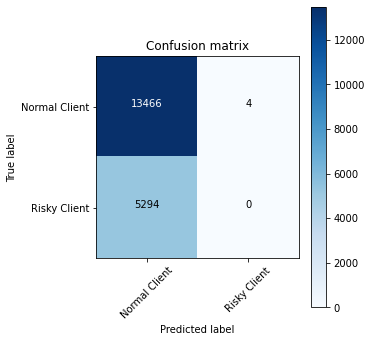

In [110]:
plt.figure(figsize=(5,5))
plot_confusion_matrix(lof_cm, ['Normal Client', 'Risky Client'])